In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
global_country = pd.read_csv('/content/drive/MyDrive/TugasMetnum/GlobalLandTemperaturesByCountry.csv')

### Exploring the data

In [ ]:
global_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [ ]:
global_country.shape

(577462, 4)

In [ ]:
sort_by_temp_desc = global_country.sort_values('AverageTemperature', ascending=False)
sort_by_temp_desc

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
284851,2012-07-01,38.842,0.464,Kuwait
284707,2000-07-01,38.705,0.467,Kuwait
284827,2010-07-01,38.495,0.498,Kuwait
284684,1998-08-01,38.436,0.353,Kuwait
284708,2000-08-01,38.315,0.593,Kuwait
...,...,...,...,...
575800,1875-04-01,NaN,NaN,Zimbabwe
575852,1879-08-01,NaN,NaN,Zimbabwe
575853,1879-09-01,NaN,NaN,Zimbabwe
575854,1879-10-01,NaN,NaN,Zimbabwe


### Visualising the upward trend

In [ ]:
global_temp = pd.read_csv('/content/drive/MyDrive/TugasMetnum/GlobalTemperatures.csv')

<Axes: title={'center': 'Average Global Temperature Movement'}, xlabel='Date (1750 - 2015)', ylabel='Average Global Temperature'>

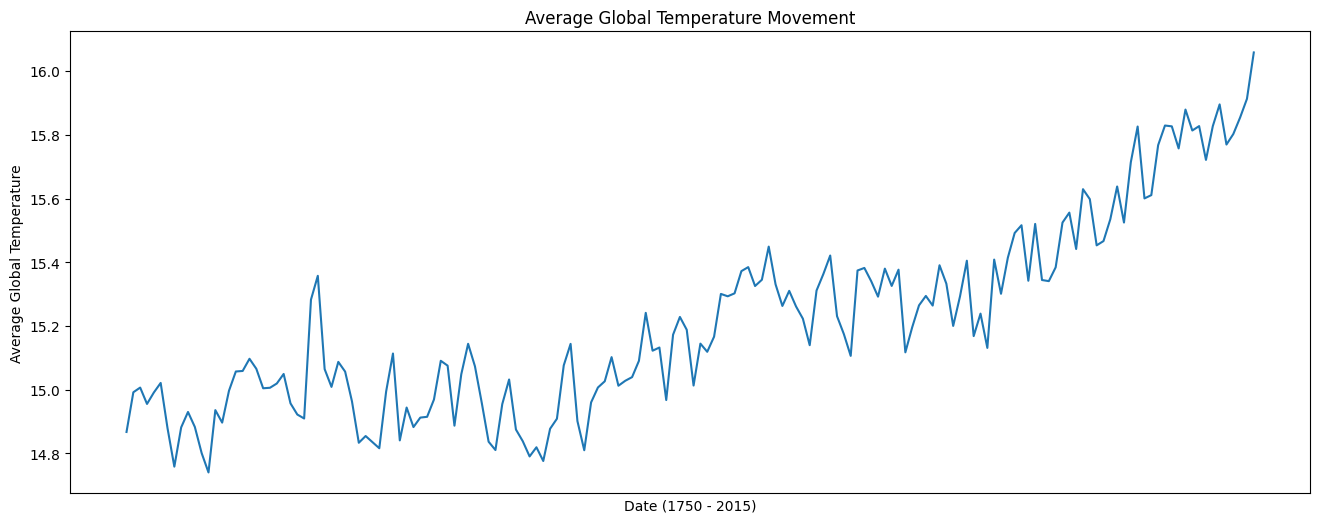

In [ ]:
global_temp = global_temp[['dt', 'LandAndOceanAverageTemperature']]
global_temp.dropna(inplace=True)
global_temp['dt'] = pd.to_datetime(global_temp.dt).dt.strftime('%d/%m/%Y')
global_temp['dt'] = global_temp['dt'].apply(lambda x:x[6:])
global_temp = global_temp.groupby(['dt'])['LandAndOceanAverageTemperature'].mean().reset_index()

plt.figure(figsize =(16, 6))
ax = sns.lineplot(
    x = global_temp['dt'],
    y = global_temp['LandAndOceanAverageTemperature'])
ax.set_title('Average Global Temperature Movement')
ax.set_ylabel('Average Global Temperature')
ax.set_xlabel('Date (1750 - 2015)')
ax.axes.get_xaxis().set_ticks([])
ax

### The above visualisation shows a clear upward trend in the average global temperature over the past years

Please be mindful that the data in the early years (1750) is likely to be a little less accurate due to the limits of the record keeping at the time

### Now I'll use machine learning to predict the future average global temperature

In [ ]:
global_temp

,dt,LandAndOceanAverageTemperature
0,1850,14.867167
1,1851,14.991833
2,1852,15.006500
3,1853,14.955167
4,1854,14.991000
...,...,...
161,2011,15.769500
162,2012,15.802333
163,2013,15.854417
164,2014,15.913000


In [ ]:
# Preparing the data for machine learning
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['Year'] = global_temp['dt'].dt.year

annual_temp = global_temp.groupby('Year')['LandAndOceanAverageTemperature'].mean().reset_index()

annual_temp = annual_temp.dropna()

X = annual_temp[['Year']].values
y = annual_temp[['LandAndOceanAverageTemperature']].values

In [ ]:
y[:5]

array([[14.86716667],
       [14.99183333],
       [15.0065    ],
       [14.95516667],
       [14.991     ]])

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train

array([[1957],
       [1874],
       [2000],
       [2001],
       [1869],
       [1979],
       [1921],
       [1987],
       [1866],
       [1969],
       [1963],
       [1890],
       [1930],
       [1872],
       [2007],
       [1998],
       [1971],
       [1933],
       [1958],
       [1877],
       [1944],
       [1981],
       [1942],
       [1913],
       [1962],
       [1868],
       [1924],
       [1916],
       [1880],
       [1961],
       [1912],
       [1852],
       [1909],
       [1940],
       [1960],
       [1893],
       [1860],
       [1939],
       [2010],
       [1954],
       [1947],
       [1936],
       [1983],
       [2009],
       [1900],
       [1959],
       [1968],
       [1914],
       [1995],
       [2014],
       [1919],
       [1899],
       [1898],
       [1935],
       [1863],
       [1988],
       [1873],
       [1973],
       [1870],
       [1865],
       [1928],
       [1902],
       [1926],
       [1853],
       [2015],
       [1951],
       [18

In [ ]:
# Fitting polynomial regression to the training set
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
# Predicting the test set results
y_pred = regressor.predict(X_test_poly)

In [ ]:
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

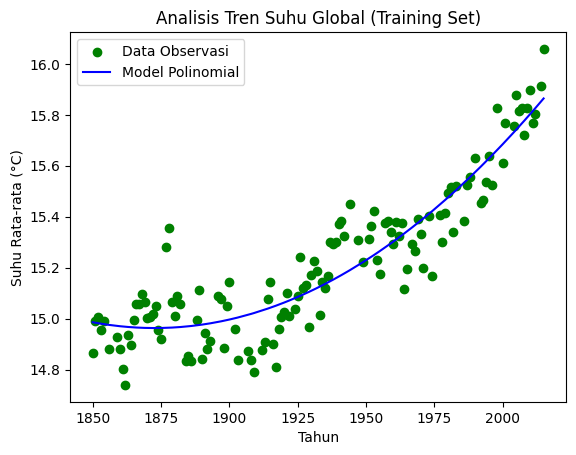

In [ ]:
# Visualising the training set results
sort_axis = np.argsort(X_train.flatten())
X_train_sorted = X_train[sort_axis]

plt.scatter(X_train, y_train, color = 'green', label='Data Observasi')
plt.plot(X_train_sorted, regressor.predict(poly_reg.transform(X_train_sorted)), color = 'blue', label='Model Polinomial')
plt.title('Analisis Tren Suhu Global (Training Set)')
plt.xlabel('Tahun')
plt.ylabel('Suhu Rata-rata (°C)')
plt.legend()
plt.show()

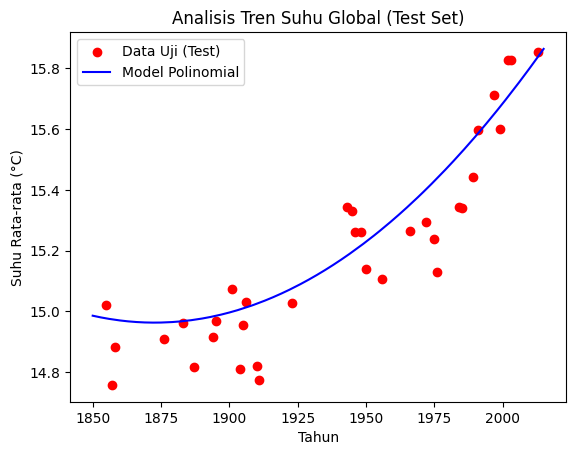

In [ ]:
# Visualising the test set results
sort_axis = np.argsort(X_train.flatten())
X_train_sorted = X_train[sort_axis]

plt.scatter(X_test, y_test, color = 'red', label='Data Uji (Test)')
plt.plot(X_train_sorted, regressor.predict(poly_reg.transform(X_train_sorted)), color = 'blue', label='Model Polinomial')
plt.title('Analisis Tren Suhu Global (Test Set)')
plt.xlabel('Tahun')
plt.ylabel('Suhu Rata-rata (°C)')
plt.legend()
plt.show()

In [40]:
# Building the predictor
years_to_predict = [[2030], [2050]]
years_poly = poly_reg.transform(years_to_predict)
predictions = regressor.predict(years_poly)

print(f"Prediksi Suhu Tahun 2030: {predictions[0][0]:.4f} °C")
print(f"Prediksi Suhu Tahun 2050: {predictions[1][0]:.4f} °C")

# Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")

Prediksi Suhu Tahun 2030: 16.0640 °C
Prediksi Suhu Tahun 2050: 16.3616 °C
Root Mean Square Error (RMSE): 0.1323


The average global temperature is likely to increase to 16.36 degrees celcius by 2050. That is an increase of circa 0.5 degrees between now and then and this is taking into account the combination average of sea and land temperatures.